In [26]:
%matplotlib notebook

import Telescope 
import thermo
import numpy as np
import matplotlib.pyplot as plt

In [27]:
pW = 1.0e12
GHz = 1.0e9

In order to initialize the telescope you must provide an atmosphere file, a hwp mueller matrix file, and an experiment directory. A sample is given in `/Experiments/small_aperture/LargeTelescope/`.

The two frequencies for a given channel are given in `channels.txt` in the experiment directory. The band ID specifies which one will be used for the calculation.

Theta is the incident angle of the light, which determines the IP of elements in the optical chain.

In [28]:
expDir = "../Experiments/small_aperture/LargeTelescope/"    
atmFile = "../src/Atacama_1000um_60deg.txt"
hwpFile = "../HWP_Mueller/AHWP_Mueller_90to150GHz_thetainc0deg.txt"

bid = 2
opts = {'theta': np.deg2rad(20)}

tel = Telescope.Telescope(expDir, atmFile, hwpFile, bid, **opts)

The Telescope object forms an optical chain made up of the elements specified in `opticalChain.txt`. The differential transmission and polarized emission for each element is calculated, and the total polarized spectrum is integrated with the emissivity and ip coefficient to get the total polarized power. A2 and A4 are by default given in pW at the detector. To convert to KRJ at the entrance of the telescope you must divide by the total efficiency and then multiply by the conversion factor

In [29]:
print "a2: ", tel.a2 * 100
print "a4: ", tel.a4 * 100
print "A2 (KRJ): ", tel.A2 / tel.cumEff(0, tel.det.band_center) * tel.toKRJ
print "A4 (KRJ): ", tel.A4/ tel.cumEff(0, tel.det.band_center) * tel.toKRJ

a2:  0.0120217874492
a4:  0.55846566328
A2 (KRJ):  0.0250190636834
A4 (KRJ):  0.115911722123


The displayTable function will return a detailed table containing the unpolarized and polarized contribution due to each optical element. From this we are able to see that the Atmosphere is emitting 13.2 pW, and the window 7.7 pW of power.

In [30]:
print tel.displayTable()

Frequency: 145 GHz	 fbw: 0.276
Element 	unpolInc	unpolEmitted	IP      	polEmitted
        	[pW]    	[pW]    	[pW]    	[pW]    
----------------------------------------------------------------------
CMB     	0.000e+00	6.542e-01	0.000e+00	0.000e+00
Atm     	6.542e-01	1.321e+01	0.000e+00	0.000e+00
Window  	1.384e+01	7.744e+00	1.320e-02	3.154e-05
IRShader1	2.110e+01	3.255e-01	0.000e+00	0.000e+00
IRShader2	2.141e+01	3.199e-01	0.000e+00	0.000e+00
IRShader3	2.170e+01	3.166e-01	0.000e+00	0.000e+00
IRShader4	2.200e+01	3.012e-01	0.000e+00	0.000e+00
IRShader1	2.228e+01	8.020e-02	0.000e+00	0.000e+00
IRShader2	2.234e+01	7.357e-02	0.000e+00	0.000e+00
IRShader3	2.239e+01	6.805e-02	0.000e+00	0.000e+00
IRShader4	2.243e+01	6.364e-02	0.000e+00	0.000e+00
AluminaF	2.247e+01	1.244e-01	1.041e-01	3.023e-05
HWP     	2.208e+01	1.816e-01	4.015e-03	1.991e-02
AluminaF	2.115e+01	1.179e-01	0.000e+00	0.000e+00
AluminaF	2.079e+01	7.394e-03	0.000e+00	0.000e+00
LowPass1	2.032e+01	1.643e-02	0.000e+00	0.000e+00
Aperture	1

Each optical element stores the unpolarized power incident and emitted from the element, and the polarized power created through differential transmission and emission

<IPython.core.display.Javascript object>


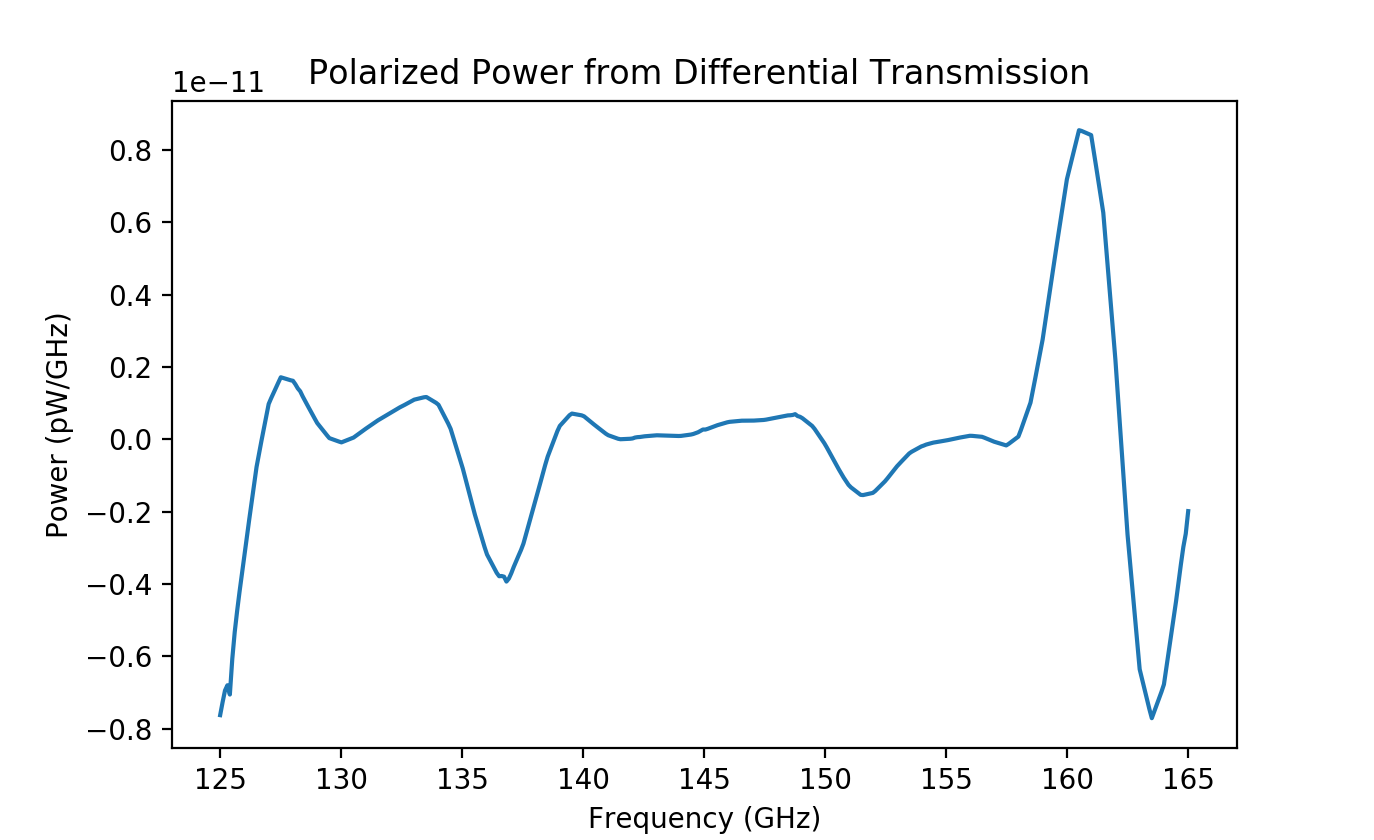

In [31]:
hwp = tel.elements[tel.hwpIndex]
plt.plot(tel.freqs / GHz, hwp.polTransmitted * pW)
plt.title("Polarized Power from Differential Transmission ")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Power (pW/GHz)")
plt.show()